### Procesamiento de datos
podemos omitir esta parte ya que es limpieza del df para su posterior uso.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import calendar
import dash
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from dash import dcc, html



In [2]:
path = r'\Users\EGiov\OneDrive\Documentos\Bahia\Python\3\Sales.xlsx'
df = pd.read_excel(path)


In [3]:
df_mod = pd.read_excel(path)
df_mod = df.dropna(axis=1, how='all')

In [4]:
df_temp = df_mod.copy()
df_temp.info()
df_temp.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
 8   Unnamed: 8     105099 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 36.8+ MB


,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Unnamed: 8
0,581492,2019-09-12 00:00:00,22418,10 Colour Spaceboy Pen,6.19,3,15492.0,United Kingdom,2.063333
1,581217,2019-08-12 00:00:00,22418,10 Colour Spaceboy Pen,6.19,2,16217.0,United Kingdom,3.095000
2,581238,2019-08-12 00:00:00,22418,10 Colour Spaceboy Pen,6.19,1,16238.0,United Kingdom,6.190000
3,581439,2019-08-12 00:00:00,22418,10 Colour Spaceboy Pen,6.19,2,15439.0,United Kingdom,3.095000
4,581196,2019-07-12 00:00:00,22418,10 Colour Spaceboy Pen,6.19,48,12935.0,United Kingdom,0.128958


In [5]:
df_temp.drop(df_temp.columns[8], axis=1, inplace=True)
df_temp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


In [6]:
nan_check = df_temp.isna().any().any()
empty_check = df_temp.empty or df_temp.applymap(lambda x: x == '').any().any()
nan_count = df_temp.isna().sum()

print(f"Número de valores NaN en la columna: \n{nan_count}")
print(f"Hay valores NaN: {nan_check}")
print(f"Hay celdas vacías: {empty_check}")

C:\Users\EGiov\AppData\Local\Temp\ipykernel_42516\4101366776.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  empty_check = df_temp.empty or df_temp.applymap(lambda x: x == '').any().any()


Número de valores NaN en la columna: 
TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
dtype: int64
Hay valores NaN: True
Hay celdas vacías: False


In [7]:
df_temp = df_temp.dropna()
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536295 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536295 non-null  object 
 1   Date           536295 non-null  object 
 2   ProductNo      536295 non-null  object 
 3   ProductName    536295 non-null  object 
 4   Price          536295 non-null  float64
 5   Quantity       536295 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536295 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.8+ MB


In [8]:
nan_check = df_temp.isna().any().any()
empty_check = df_temp.empty or df_temp.applymap(lambda x: x == '').any().any()
nan_count = df_temp.isna().sum()

print(f"Número de valores NaN en la columna 'TransactionNo': {nan_count}")
print(f"Hay valores NaN: {nan_check}")
print(f"Hay celdas vacías: {empty_check}")

C:\Users\EGiov\AppData\Local\Temp\ipykernel_42516\2854646406.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  empty_check = df_temp.empty or df_temp.applymap(lambda x: x == '').any().any()


Número de valores NaN en la columna 'TransactionNo': TransactionNo    0
Date             0
ProductNo        0
ProductName      0
Price            0
Quantity         0
CustomerNo       0
Country          0
dtype: int64
Hay valores NaN: False
Hay celdas vacías: False


In [9]:
df_temp.head(176)

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581492,2019-09-12 00:00:00,22418,10 Colour Spaceboy Pen,6.19,3,15492.0,United Kingdom
1,581217,2019-08-12 00:00:00,22418,10 Colour Spaceboy Pen,6.19,2,16217.0,United Kingdom
2,581238,2019-08-12 00:00:00,22418,10 Colour Spaceboy Pen,6.19,1,16238.0,United Kingdom
3,581439,2019-08-12 00:00:00,22418,10 Colour Spaceboy Pen,6.19,2,15439.0,United Kingdom
4,581196,2019-07-12 00:00:00,22418,10 Colour Spaceboy Pen,6.19,48,12935.0,United Kingdom
...,...,...,...,...,...,...,...,...
171,558700,2019-01-07 00:00:00,22418,10 Colour Spaceboy Pen,11.12,1,17920.0,United Kingdom
172,558714,2019-01-07 00:00:00,22418,10 Colour Spaceboy Pen,11.12,10,17888.0,United Kingdom
173,C558716,2019-01-07 00:00:00,22418,10 Colour Spaceboy Pen,11.12,-10,17888.0,United Kingdom
174,558485,6/30/2019,22418,10 Colour Spaceboy Pen,11.12,1,16485.0,United Kingdom


In [10]:
def mostrar_filas_negativas(df_temp, columna):
    filas_negativas = df_temp[df_temp[columna] < 0]

    print("Filas con valores negativos en la columna '{}':".format(columna))
    print(pd.DataFrame(filas_negativas))

    print("\nCantidad de valores negativos en la columna '{}': {}".format(columna, len(filas_negativas)))

mostrar_filas_negativas(df_temp, 'Quantity')

Filas con valores negativos en la columna 'Quantity':
       TransactionNo                 Date ProductNo  \
173          C558716  2019-01-07 00:00:00     22418   
215          C551464            4/28/2019     22418   
217          C551180            4/26/2019     22418   
232          C548717  2019-04-04 00:00:00     22418   
269          C542426            1/28/2019     22418   
...              ...                  ...       ...   
535865       C564488            8/25/2019     23144   
535988       C552556  2019-10-05 00:00:00     23144   
536034       C538114  2018-09-12 00:00:00     21275   
536036       C537756  2018-08-12 00:00:00     21275   
536237       C548972  2019-05-04 00:00:00     84832   

                            ProductName  Price  Quantity  CustomerNo  \
173              10 Colour Spaceboy Pen  11.12       -10     17888.0   
215              10 Colour Spaceboy Pen  11.12       -48     13085.0   
217              10 Colour Spaceboy Pen  11.12       -24     14586.0 

In [11]:
def convertir_a_valor_absoluto(df_temp, columna):
    df_temp[columna] = df_temp[columna].abs()

convertir_a_valor_absoluto(df_temp, 'Quantity')
mostrar_filas_negativas(df_temp, 'Quantity')

df_temp = df_temp[df_temp['Country'] != 'Unspecified']


Filas con valores negativos en la columna 'Quantity':
Empty DataFrame
Columns: [TransactionNo, Date, ProductNo, ProductName, Price, Quantity, CustomerNo, Country]
Index: []

Cantidad de valores negativos en la columna 'Quantity': 0


In [12]:
temp1= df_temp.copy()

In [13]:
temp1.head(176)

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581492,2019-09-12 00:00:00,22418,10 Colour Spaceboy Pen,6.19,3,15492.0,United Kingdom
1,581217,2019-08-12 00:00:00,22418,10 Colour Spaceboy Pen,6.19,2,16217.0,United Kingdom
2,581238,2019-08-12 00:00:00,22418,10 Colour Spaceboy Pen,6.19,1,16238.0,United Kingdom
3,581439,2019-08-12 00:00:00,22418,10 Colour Spaceboy Pen,6.19,2,15439.0,United Kingdom
4,581196,2019-07-12 00:00:00,22418,10 Colour Spaceboy Pen,6.19,48,12935.0,United Kingdom
...,...,...,...,...,...,...,...,...
171,558700,2019-01-07 00:00:00,22418,10 Colour Spaceboy Pen,11.12,1,17920.0,United Kingdom
172,558714,2019-01-07 00:00:00,22418,10 Colour Spaceboy Pen,11.12,10,17888.0,United Kingdom
173,C558716,2019-01-07 00:00:00,22418,10 Colour Spaceboy Pen,11.12,10,17888.0,United Kingdom
174,558485,6/30/2019,22418,10 Colour Spaceboy Pen,11.12,1,16485.0,United Kingdom


In [14]:
temp1['Date'] = pd.to_datetime(temp1['Date'], errors='coerce')
temp1['Date'] = temp1['Date'].dt.strftime('%Y-%m-%d')
temp1.head(176)

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581492,2019-09-12,22418,10 Colour Spaceboy Pen,6.19,3,15492.0,United Kingdom
1,581217,2019-08-12,22418,10 Colour Spaceboy Pen,6.19,2,16217.0,United Kingdom
2,581238,2019-08-12,22418,10 Colour Spaceboy Pen,6.19,1,16238.0,United Kingdom
3,581439,2019-08-12,22418,10 Colour Spaceboy Pen,6.19,2,15439.0,United Kingdom
4,581196,2019-07-12,22418,10 Colour Spaceboy Pen,6.19,48,12935.0,United Kingdom
...,...,...,...,...,...,...,...,...
171,558700,2019-01-07,22418,10 Colour Spaceboy Pen,11.12,1,17920.0,United Kingdom
172,558714,2019-01-07,22418,10 Colour Spaceboy Pen,11.12,10,17888.0,United Kingdom
173,C558716,2019-01-07,22418,10 Colour Spaceboy Pen,11.12,10,17888.0,United Kingdom
174,558485,2019-06-30,22418,10 Colour Spaceboy Pen,11.12,1,16485.0,United Kingdom


In [15]:
temp1['Date'] = pd.to_datetime(temp1['Date'], errors='coerce')
fila_seleccionada = 0  
fila_seleccionada1 = 175  

fecha_seleccionada = temp1.loc[fila_seleccionada, 'Date']
fecha_seleccionada1 = temp1.loc[fila_seleccionada1, 'Date']

print(f'Año: {fecha_seleccionada.year}, Mes: {fecha_seleccionada.month}, Día: {fecha_seleccionada.day}')
print(f'Año: {fecha_seleccionada1.year}, Mes: {fecha_seleccionada1.month}, Día: {fecha_seleccionada1.day}')


Año: 2019, Mes: 9, Día: 12
Año: 2019, Mes: 6, Día: 30


In [16]:
temp1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 535848 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TransactionNo  535848 non-null  object        
 1   Date           535848 non-null  datetime64[ns]
 2   ProductNo      535848 non-null  object        
 3   ProductName    535848 non-null  object        
 4   Price          535848 non-null  float64       
 5   Quantity       535848 non-null  int64         
 6   CustomerNo     535848 non-null  float64       
 7   Country        535848 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 52.9+ MB


In [17]:
temp1 = temp1[pd.to_numeric(temp1['TransactionNo'], errors='coerce').notna()]
temp1.info()
temp1.head(176)

<class 'pandas.core.frame.DataFrame'>
Index: 527317 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TransactionNo  527317 non-null  object        
 1   Date           527317 non-null  datetime64[ns]
 2   ProductNo      527317 non-null  object        
 3   ProductName    527317 non-null  object        
 4   Price          527317 non-null  float64       
 5   Quantity       527317 non-null  int64         
 6   CustomerNo     527317 non-null  float64       
 7   Country        527317 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.2+ MB


,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581492,2019-09-12,22418,10 Colour Spaceboy Pen,6.19,3,15492.0,United Kingdom
1,581217,2019-08-12,22418,10 Colour Spaceboy Pen,6.19,2,16217.0,United Kingdom
2,581238,2019-08-12,22418,10 Colour Spaceboy Pen,6.19,1,16238.0,United Kingdom
3,581439,2019-08-12,22418,10 Colour Spaceboy Pen,6.19,2,15439.0,United Kingdom
4,581196,2019-07-12,22418,10 Colour Spaceboy Pen,6.19,48,12935.0,United Kingdom
...,...,...,...,...,...,...,...,...
171,558700,2019-01-07,22418,10 Colour Spaceboy Pen,11.12,1,17920.0,United Kingdom
172,558714,2019-01-07,22418,10 Colour Spaceboy Pen,11.12,10,17888.0,United Kingdom
174,558485,2019-06-30,22418,10 Colour Spaceboy Pen,11.12,1,16485.0,United Kingdom
175,558571,2019-06-30,22418,10 Colour Spaceboy Pen,11.12,24,17017.0,United Kingdom


In [18]:
temp1.head(176)

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581492,2019-09-12,22418,10 Colour Spaceboy Pen,6.19,3,15492.0,United Kingdom
1,581217,2019-08-12,22418,10 Colour Spaceboy Pen,6.19,2,16217.0,United Kingdom
2,581238,2019-08-12,22418,10 Colour Spaceboy Pen,6.19,1,16238.0,United Kingdom
3,581439,2019-08-12,22418,10 Colour Spaceboy Pen,6.19,2,15439.0,United Kingdom
4,581196,2019-07-12,22418,10 Colour Spaceboy Pen,6.19,48,12935.0,United Kingdom
...,...,...,...,...,...,...,...,...
171,558700,2019-01-07,22418,10 Colour Spaceboy Pen,11.12,1,17920.0,United Kingdom
172,558714,2019-01-07,22418,10 Colour Spaceboy Pen,11.12,10,17888.0,United Kingdom
174,558485,2019-06-30,22418,10 Colour Spaceboy Pen,11.12,1,16485.0,United Kingdom
175,558571,2019-06-30,22418,10 Colour Spaceboy Pen,11.12,24,17017.0,United Kingdom


In [19]:
temp1['CustomerId'] = pd.to_numeric(temp1['CustomerNo'], errors='coerce').astype('int64')
temp1.drop('CustomerNo', axis=1, inplace=True)
temp1['ProductNo'] = temp1['ProductNo'].astype(str)
temp1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 527317 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TransactionNo  527317 non-null  object        
 1   Date           527317 non-null  datetime64[ns]
 2   ProductNo      527317 non-null  object        
 3   ProductName    527317 non-null  object        
 4   Price          527317 non-null  float64       
 5   Quantity       527317 non-null  int64         
 6   Country        527317 non-null  object        
 7   CustomerId     527317 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 36.2+ MB


In [20]:
hay_nan = temp1.isna().any().any()
if hay_nan:
    print('Hay valores NaN en temp1.')
else:
    print('No hay valores NaN en temp1.')


No hay valores NaN en temp1.


In [21]:
temp1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 527317 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TransactionNo  527317 non-null  object        
 1   Date           527317 non-null  datetime64[ns]
 2   ProductNo      527317 non-null  object        
 3   ProductName    527317 non-null  object        
 4   Price          527317 non-null  float64       
 5   Quantity       527317 non-null  int64         
 6   Country        527317 non-null  object        
 7   CustomerId     527317 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 36.2+ MB


In [22]:
temp1.to_excel('Sales_clean.xlsx', index=False)

### Visualización de los datos

In [23]:
def year_summ_2018(data_frame):
    monthly_sums_2018 = {}

    for month in range(1, 13):
        df_month_2018 = data_frame[(data_frame['Date'].dt.year == 2018) & (data_frame['Date'].dt.month == month)]

        if not df_month_2018.empty:
            monthly_sum = df_month_2018['Price'].sum()

            monthly_sums_2018[f'month_{month}_2018'] = monthly_sum

            print(f"Total de ventas para {df_month_2018['Date'].dt.month_name().iloc[0]} de 2018: ${monthly_sum:,.2f}")
        else:
            print(f"No hay datos para {calendar.month_name[month]} de 2018")

    total_price_2018 = sum(monthly_sums_2018.values())
    print(f"Total de ventas en 2018: ${total_price_2018:,.2f}")
def year_summ_2019(data_frame):
    monthly_sums_2019 = {}

    for month in range(1, 13):
        df_month_2019 = data_frame[(data_frame['Date'].dt.year == 2019) & (data_frame['Date'].dt.month == month)]

        if not df_month_2019.empty:
            monthly_sum = df_month_2019['Price'].sum()

            monthly_sums_2019[f'month_{month}_2018'] = monthly_sum

            print(f"Total de ventas para {df_month_2019['Date'].dt.month_name().iloc[0]} de 2018: ${monthly_sum:,.2f}")
        else:
            print(f"No hay datos para {calendar.month_name[month]} de 2019")

    total_price_2018 = sum(monthly_sums_2019.values())
    print(f"Total de ventas en 2018: ${total_price_2018:,.2f}")


In [24]:
def plot_year_comparison(data_frame):

    df_2018 = data_frame[data_frame['Date'].dt.year == 2018]
    df_2019 = data_frame[data_frame['Date'].dt.year == 2019]

    monthly_sum_2018 = df_2018.groupby(df_2018['Date'].dt.month).agg({'Price': 'sum', 'Quantity': 'sum'})

    monthly_sum_2019 = df_2019.groupby(df_2019['Date'].dt.month).agg({'Price': 'sum', 'Quantity': 'sum'})

    month_names = list(calendar.month_abbr)[1:]

    plt.figure(figsize=(10, 6))
    plt.plot(monthly_sum_2018.index, monthly_sum_2018['Price'], marker='o', linestyle='-', color='b', label='2018')
    plt.plot(monthly_sum_2019.index, monthly_sum_2019['Price'], marker='o', linestyle='-', color='r', label='2019')

    plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

    for x, y in zip(monthly_sum_2018.index, monthly_sum_2018['Price']):
        plt.text(x, y, f'${y:,.0f}', ha='center', va='top', color='black', fontsize=8, weight='bold')

    for x, y in zip(monthly_sum_2019.index, monthly_sum_2019['Price']):
        plt.text(x, y, f'${y:,.0f}', ha='center', va='top', color='black', fontsize=8, weight='bold')

    plt.xticks(range(1, 13), month_names[0:])  
    plt.legend(loc='upper left')

    plt.title('Suma de Precios y Cantidad Vendida por Mes en 2018 vs 2019')
    plt.xlabel('Mes')
    plt.ylabel('Suma de Precios')
    plt.grid(True)
    plt.show()



### Procesamiento del db

Se encuentra que los datos de la columna 'Date', se deben de convertir 2 veces a tipo 'Date', ya que la primera vez que se transforma, mantiene el dtype 'obj' y en la segunda que se transforman los datos, existen valores nulos que no aparecen como nulos. 

Por lo que su eliminacion se completa en la transformación de datos en Power Bi 

### Comparativo de ventas 2018 vs 2019

Se hace una revisión para corrborar si existen datos en 2018 para los meses 04 y 11, debido a que la gráfica no muestra nada

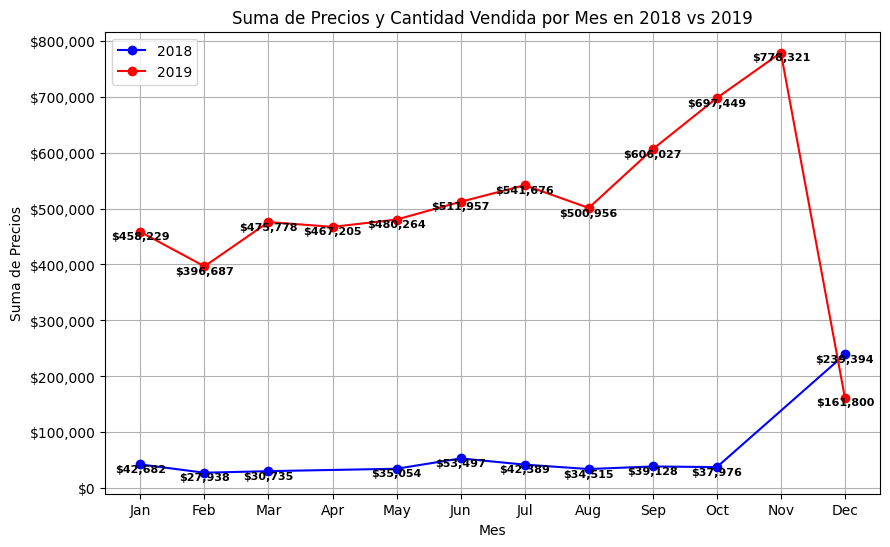

Total de ventas para January de 2018: $42,681.74
Total de ventas para February de 2018: $27,938.20
Total de ventas para March de 2018: $30,734.64
No hay datos para April de 2018
Total de ventas para May de 2018: $35,054.39
Total de ventas para June de 2018: $53,497.22
Total de ventas para July de 2018: $42,389.14
Total de ventas para August de 2018: $34,514.68
Total de ventas para September de 2018: $39,128.25
Total de ventas para October de 2018: $37,976.17
No hay datos para November de 2018
Total de ventas para December de 2018: $239,394.05
Total de ventas en 2018: $583,308.48


Total de ventas para January de 2018: $458,228.76
Total de ventas para February de 2018: $396,686.79
Total de ventas para March de 2018: $475,778.00
Total de ventas para April de 2018: $467,205.45
Total de ventas para May de 2018: $480,264.31
Total de ventas para June de 2018: $511,957.14
Total de ventas para July de 2018: $541,676.12
Total de ventas para August de 2018: $500,955.95
Total de ventas para Septe

In [25]:
plot_year_comparison(temp1)
year_summ_2018(temp1)
print('\n')
year_summ_2019(temp1)

Al hacer una busqueda de la suma de "Price" por mes, se encuentra que los mese 04 y 11 no tienen datos

### Visualización del top 10 products vendidos en el 2018

(La gráfica es manipulable) doble click para seleccionar solo una variable, doble doble click para eliminar filtrado

In [26]:
def mostrar_top_productos(df_temp, year):
    df_temp['Date'] = pd.to_datetime(df_temp['Date'])

    df_year = df_temp[df_temp['Date'].dt.year == year]

    top_productos = df_year['ProductName'].value_counts().nlargest(10)

    fig = make_subplots(rows=1, cols=1, specs=[[{'type':'domain'}]])

    fig.add_trace(go.Pie(labels=top_productos.index, values=top_productos, name=str(year),
                         hole=0.3, textinfo='label+percent'))

    fig.add_annotation(text=str(year), x=0.5, y=0.5, font_size=15, showarrow=False)

    fig.update_layout(title_text=f'Top 10 de productos más vendidos en {year}', template='plotly')

    fig.show()

mostrar_top_productos(temp1, 2018)

### Visualización del top 200 productos vendidos en el 2018

(La gráfica es manipulable las funciones estan en el extremo superior derecho) doble click para resetar 

In [27]:
def mostrar_top_productos_barras(df_temp, year, top_n=200):
    # Filtrar datos para el año específico
    df_year = df_temp[df_temp['Date'].dt.year == year]

    # Obtener los N productos más vendidos para el año específico
    top_productos = df_year['ProductName'].value_counts().nlargest(top_n)

    # Crear colores para las barras en una escala de colores
    colores_escala = [f'rgba({i}, 0, {255 - i}, 0.6)' for i in range(256)]
    colores_barras = [colores_escala[i % 256] for i in range(len(top_productos))]

    # Crear la figura de Plotly
    fig = go.Figure()
    fig.add_trace(go.Bar(x=top_productos.index, y=top_productos.values, marker=dict(color=colores_barras)))
    fig.update_layout(title=f'Top {top_n} de productos más vendidos en {year}',
                      xaxis_title='Producto',
                      yaxis_title='Ventas',
                      xaxis=dict(tickangle=45))

    return fig

def mostrar_grafico_barras(df_temp, year, top_n=200):
    # Obtener la figura con los datos y diseño configurados
    fig = mostrar_top_productos_barras(df_temp, year, top_n)

    # Configurar la aplicación Dash
    app = dash.Dash(__name__)

    # Configurar el diseño de la aplicación
    app.layout = html.Div([
        dcc.Graph(figure=fig)
    ])

    # Iniciar la aplicación si se ejecuta este script
    if __name__ == '__main__':
        app.run_server(debug=True)

mostrar_grafico_barras(temp1, 2018)

### Visualización del top 10 products vendidos en el 2019


In [28]:
def mostrar_top_productos_pie(df_temp, year, top_n=10):

    df_year = df_temp[df_temp['Date'].dt.year == year]

    top_productos = df_year['ProductName'].value_counts().nlargest(top_n)

    fig = make_subplots(rows=1, cols=1, specs=[[{'type':'domain'}]])

    fig.add_trace(go.Pie(labels=top_productos.index, values=top_productos, name=str(year),
                         hole=0.3, textinfo='label+percent'))

    fig.add_annotation(text=str(year), x=0.5, y=0.5, font_size=15, showarrow=False)

    fig.update_layout(title_text=f'Top {top_n} de productos más vendidos en {year}', template='plotly')

    fig.show()

mostrar_top_productos_pie(temp1, 2019)

### Visualización del top 200 productos vendidos en el 2019


In [29]:
def mostrar_top_productos_barras_dash(df_temp, year, top_n=200):

    df_year = df_temp[df_temp['Date'].dt.year == year]

    top_productos = df_year['ProductName'].value_counts().nlargest(top_n)

    colores_escala = [f'rgba({i}, 0, {255 - i}, 0.6)' for i in range(256)]
    colores_barras = [colores_escala[i % 256] for i in range(len(top_productos))]

    fig = go.Figure()
    fig.add_trace(go.Bar(x=top_productos.index, y=top_productos.values, marker=dict(color=colores_barras)))
    fig.update_layout(title=f'Top {top_n} de productos más vendidos en {year}',
                      xaxis_title='Producto',
                      yaxis_title='Ventas',
                      xaxis=dict(tickangle=45))

    app = dash.Dash(__name__)

    app.layout = html.Div([
        dcc.Graph(figure=fig)
    ])

    if __name__ == '__main__':
        app.run_server(debug=True)

mostrar_top_productos_barras_dash(temp1, 2019)


### Visualización de stack bars, para ver las ventas totales por mes, con base al país

(La gráfica es manipulable)

In [32]:
def mostrar_ventas_por_pais(df_temp):

    df_temp['Date'] = pd.to_datetime(df_temp['Date'])

    df_2018_2019 = df_temp[df_temp['Date'].dt.year.isin([2018, 2019])]

    df_2018_2019['Date'] = df_2018_2019['Date'].dt.to_period("M").astype(str)

    df_grouped = df_2018_2019.groupby(['Date', 'Country']).agg({'Price': 'sum'}).reset_index()

    fig = px.bar(df_grouped, x='Date', y='Price', color='Country',
                 title='Ventas por País en 2018 y 2019',
                 labels={'Price': 'Suma de Price'},
                 category_orders={'Date': sorted(df_grouped['Date']),
                                  'Country': sorted(df_grouped['Country'])})

    fig.update_layout(xaxis_title='Mes', yaxis_title='Ventas')

    fig.show()

mostrar_ventas_por_pais(temp1)


### Visualización de stack bars para ver la cantidad de productos comprados por mes en cada país

(La gráfica es manipulable)


In [ ]:
def mostrar_productos_por_cliente_2018_pais(df_temp):

    df_temp['Date'] = pd.to_datetime(df_temp['Date'])

    df_2018 = df_temp[df_temp['Date'].dt.year == 2018]

    df_2018['Month'] = df_2018['Date'].dt.month

    productos_por_cliente = df_2018.groupby(['Month', 'TransactionNo', 'CustomerId', 'Country'])['Quantity'].sum().reset_index()

    fig = px.bar(productos_por_cliente, x='Month', y='Quantity', color='Country',
                 title='Cantidad de Productos Comprados por País (2018)',
                 labels={'Quantity': 'Número de Productos'},
                 category_orders={'Month': list(range(1, 13))})

    fig.update_layout(xaxis_title='Mes', yaxis_title='Número de Productos')

    fig.show()

mostrar_productos_por_cliente_2018_pais(temp1)


C:\Users\EGiov\AppData\Local\Temp\ipykernel_16320\518629111.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Visualización de stack bars para ver la número de productos comprados por transacción por cada mes del 2018

(La gráfica es manipulable)

In [ ]:
def mostrar_productos_por_cliente_2018(df_temp):
    df_temp['Date'] = pd.to_datetime(df_temp['Date'])

    df_2018 = df_temp[df_temp['Date'].dt.year == 2018]

    df_2018['Month'] = df_2018['Date'].dt.month

    productos_por_cliente = df_2018.groupby(['Month', 'TransactionNo', 'CustomerId'])['Quantity'].sum().reset_index()

    fig = px.bar(productos_por_cliente, x='Month', y='Quantity', color='TransactionNo',
                 title='Cantidad de Productos Comprados por Transacción por Mes (2018)',
                 labels={'Quantity': 'Número de Productos', 'TransactionNo': 'Número de Transacción'},
                 category_orders={'Month': list(range(1, 13))})

    fig.update_layout(xaxis_title='Mes', yaxis_title='Número de Productos')

    fig.show()

mostrar_productos_por_cliente_2018(temp1)

C:\Users\EGiov\AppData\Local\Temp\ipykernel_16320\2387333936.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Visualización de stack bars para ver la cantidad de productos comprados por mes en cada país

(La gráfica es manipulable)


In [ ]:

def mostrar_productos_por_cliente_2019_pais(df_temp):

    df_temp['Date'] = pd.to_datetime(df_temp['Date'])

    df_2019 = df_temp[df_temp['Date'].dt.year == 2019]

    df_2019['Month'] = df_2019['Date'].dt.month

    productos_por_cliente = df_2019.groupby(['Month', 'TransactionNo', 'CustomerId', 'Country'])['Quantity'].sum().reset_index()

    fig = px.bar(productos_por_cliente, x='Month', y='Quantity', color='Country',
                 title='Cantidad de Productos Comprados por País (2019)',
                 labels={'Quantity': 'Número de Productos'},
                 category_orders={'Month': list(range(1, 13))})

    fig.update_layout(xaxis_title='Mes', yaxis_title='Número de Productos')

    fig.show()

mostrar_productos_por_cliente_2019_pais(temp1)


C:\Users\EGiov\AppData\Local\Temp\ipykernel_16320\1233274364.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Visualización de stack bars para ver la número de productos comprados por transacción por cada mes del 2018

(La gráfica es manipulable)

In [ ]:
def mostrar_productos_por_cliente_2019(df_temp):

    df_temp['Date'] = pd.to_datetime(df_temp['Date'])

    df_2019 = df_temp[df_temp['Date'].dt.year == 2019]

    df_2019['Month'] = df_2019['Date'].dt.month

    productos_por_cliente = df_2019.groupby(['Month', 'TransactionNo', 'CustomerId'])['Quantity'].sum().reset_index()

    fig = px.bar(productos_por_cliente, x='Month', y='Quantity', color='TransactionNo',
                 title='Cantidad de Productos Comprados por Transacción por Mes (2019)',
                 labels={'Quantity': 'Número de Productos', 'TransactionNo': 'Número de Transacción'},
                 category_orders={'Month': list(range(1, 13))})

    fig.update_layout(xaxis_title='Mes', yaxis_title='Número de Productos')

    fig.show()

mostrar_productos_por_cliente_2019(temp1)


C:\Users\EGiov\AppData\Local\Temp\ipykernel_16320\768537454.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

